## Imports

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Mar  9 10:27:04 2019

@author: HP
"""
from copy import deepcopy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#loading data
dataset = pd.read_csv('k-means.csv', names = ['A', 'B'], sep = "\t")

In [3]:
#preprocessing data
dataset['A'] =  dataset['A'].map(lambda x: x.replace(",", ".")).map(float)
dataset['B'] = dataset['B'].map(lambda x: x.replace(",", ".")).map(float)
a = dataset['A'].values
b = dataset['B'].values

Text(0.5,1,'Loading data')

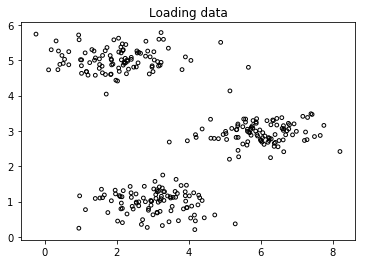

In [4]:
#visualisation 
plt.figure
plt.scatter(a, b, s = 14,edgecolors = 'black', facecolors = 'none')
plt.title("Loading data")

In [5]:
dataset.describe()


,A,B
count,300.000000,300.000000
mean,3.684376,2.987101
std,1.925578,1.685078
min,-0.245127,0.205810
25%,2.156202,1.210797
50%,3.231561,2.949738
75%,5.509490,4.807780
max,8.203398,5.784297


In [6]:
#taking data into array from file
X = np.array(list(zip(a,b)))

In [7]:
#list of functions for k_means 
# Euclidean Distance finder
def  E_D_Function(a, b, ax=1):
    dif= a-b
    distance = np.linalg.norm(dif, axis = ax)
    return distance

In [8]:
#random centroids
def C_R_Function(k, data):
     # random centroids for x cordinates
    C_x = np.random.uniform(np.min(data[:,0]) + 1, np.max(data[:,0]) - 2, size=k)
     # random centroids for y cordinates
    C_y = np.random.uniform(np.min(data[:,1]) + 1, np.max(data[:,1]) - 1, size=k) 
    # To store the value of centroids when it updates
    arr_xy = np.array(list(zip(C_x, C_y)), dtype=np.float32) 
    return arr_xy

In [9]:
#finding difference distance between random and real data
def C_E_Function(r):
    C_pre = np.zeros(r.shape)
    error = E_D_Function(r, C_pre, None)
    # E_D_function is difference between new centroids and previous centroids
    return error   

In [10]:
def label_Function(X, C_er, C_arr):
    m = len(X)
    C_cl = np.zeros(m)
# Loop will run untill the error equals to zero
    while C_er != 0:
        for i in range(m):
            dif = E_D_Function(X[i], C_arr) #dif-distance
            cluster = np.argmin(dif)
            C_cl[i] = cluster #C_cl - clusters
            # Storing the previous values of centroid
            C_pre = deepcopy(C_arr)
            # New centroids by taking the mean of value
            for i in range(k_c):
                dots = [X[j] for j in range(m) if C_cl[j] == i]
                C_arr[i] = np.mean(dots, axis=0)
                C_er = E_D_Function(C_arr, C_pre, None)
    return dots, C_cl

In [11]:
def plot_Function(k, data, dots, C_labels, C_arr):  
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    fig, ax = plt.subplots()
    m = len(data)
    for i in range(k):
        dots = np.array([data[j]
        for j in range(m)
        if C_labels[j] == i])
        ax.scatter(dots[:, 0], dots[:, 1], edgecolors=colors[i], s = 12, facecolors = 'none')
        plt.text(C_arr[i, 0], C_arr[i, 1], s=str(i), fontsize=14, weight='bold')
        plt.title("Clustering data")
    return ax

In [12]:
# K_c - size of clusters
# size of clusters (for our project  3 is appropriate since there exist 3 different types)
#if we change k it will affect the clusters size , we can use 1 2 3 4 5 6
k_c = 3

In [13]:
#C_arr is centroids
C_arr = C_R_Function(k_c,X)
print(C_arr) #randomise data

[[5.2938414  2.782434  ]
 [0.75520724 2.0582347 ]
 [2.3790174  3.9181395 ]]


In [14]:
#Cluster error
C_er = C_E_Function(C_arr)
print(C_er)

7.847604962938043


In [15]:
#labeling data
dots, C_labels = label_Function(X, C_er, C_arr)

C:\Users\HP\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


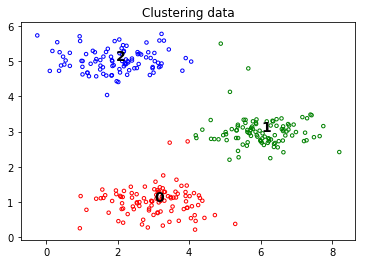

In [16]:
#ploting given data 
plot_Function(k_c, X, dots, C_labels, C_arr)

In [17]:
#taking into consideration history of each random centroids and savig in array 
iters = 10
h = C_R_Function(iters,X)
C_h = C_R_Function(k_c,h)
C_er_h = C_E_Function(C_h)
dots_h, C_labels_h = label_Function(h, C_er_h, C_h)

C:\Users\HP\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


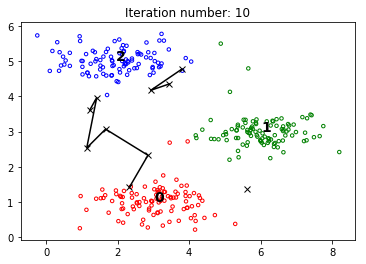

In [18]:
#ploting given data iteratinon points noted
plot_Function(k_c, X, dots, C_labels, C_arr)
plt.title('Iteration number: {}'.format(iters))
m = len(h)
for i in range(k_c):
    dots_h = np.array([h[j] for j in range(m)if C_labels_h[j] == i])
    plt.plot(dots_h[:,0], dots_h[:,1], marker='x', c='black')

Text(0.5,1,'Loading test data')

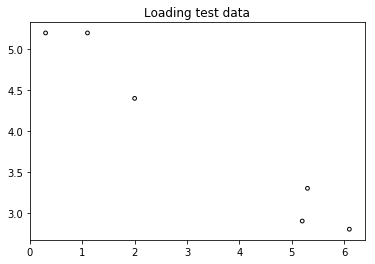

In [19]:
#Testing part
data_t = pd.DataFrame({'A': [0.3, 2, 1.1, 5.2, 5.3, 6.1], 'B': [5.2, 4.4, 5.2, 2.9, 3.3, 2.8]})
a_t = data_t['A'].values
b_t = data_t['B'].values
plt.figure()
plt.scatter(a_t, b_t, s = 14,edgecolors = 'black', facecolors = 'none')
plt.title("Loading test data")

In [20]:
data_t.describe()


,A,B
count,6.000000,6.000000
mean,3.333333,3.966667
std,2.488909,1.111156
min,0.300000,2.800000
25%,1.325000,3.000000
50%,3.600000,3.850000
75%,5.275000,5.000000
max,6.100000,5.200000


In [21]:
X_t = np.array(list(zip(a_t,b_t)))
C_arr_t = C_R_Function(k_c,X_t)
C_er_t = C_E_Function(C_arr_t)
dots_t, C_labels_t = label_Function(X_t, C_er_t, C_arr_t)

C:\Users\HP\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


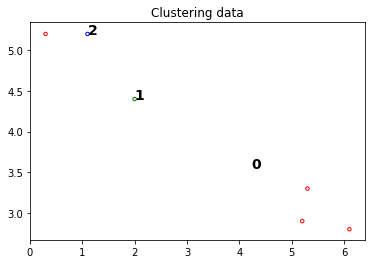

In [22]:
#ploting testing data 
plot_Function(k_c, X_t, dots_t, C_labels_t, C_arr_t)

In [23]:
from sklearn.cluster import KMeans

In [24]:
#assiging clustering size to KMeans functions
K = KMeans(k_c)
X = dataset[['A', 'B']].values

In [25]:
#fitting data
K.fit(X)
#finding centroids
C_arr = np.array(K.cluster_centers_)
#finding labels via predict function of Kmeans liabrary
dataset['labels'] = K.predict(X)
C_labels = dataset['labels'].values

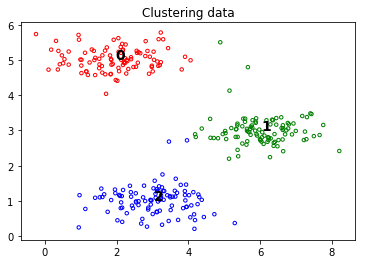

In [26]:
#ploting
plot_Function(k_c, X, dots, C_labels, C_arr)

In [27]:
#testing
data_t = pd.DataFrame({'A': [0.3, 2, 1.1, 5.2, 5.3, 6.1], 'B': [5.2, 4.4, 5.2, 2.9, 3.3, 2.8]})
X_t = data_t[['A','B']].values

In [28]:
#fitting data
K.fit(X_t)
#finding centroids
C_arr_t = np.array(K.cluster_centers_)
#finding labels via predict function of Kmeans liabrary
data_t['labels'] = K.predict(X_t)
C_labels_t = data_t['labels'].values

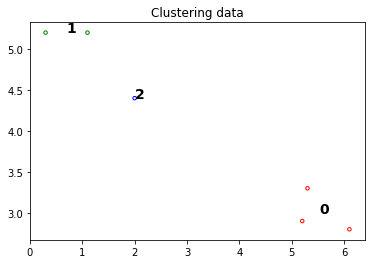

In [29]:
#ploting
plot_Function(k_c, X_t, dots_t, C_labels_t, C_arr_t)